In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from linear_regression_model import LinearRegressionModel
import joblib

In [36]:
data = pd.read_csv("Student_Performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [37]:
data["Extracurricular Activities"].dtype

dtype('O')

In [38]:
data = pd.get_dummies(data,columns=["Extracurricular Activities"])
data["Extracurricular Activities_No"].dtype

dtype('bool')

In [39]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities_No       0
Extracurricular Activities_Yes      0
dtype: int64

In [40]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities_No       0
Extracurricular Activities_Yes      0
dtype: int64

In [41]:
data_features = data.drop(columns="Performance Index")
data_target = data["Performance Index"]
print(data_features)
data_target

      Hours Studied  ...  Extracurricular Activities_Yes
0                 7  ...                            True
1                 4  ...                           False
2                 8  ...                            True
3                 5  ...                            True
4                 7  ...                           False
...             ...  ...                             ...
9995              1  ...                            True
9996              7  ...                            True
9997              6  ...                            True
9998              9  ...                            True
9999              7  ...                           False

[10000 rows x 6 columns]


0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

<Figure size 800x600 with 0 Axes>

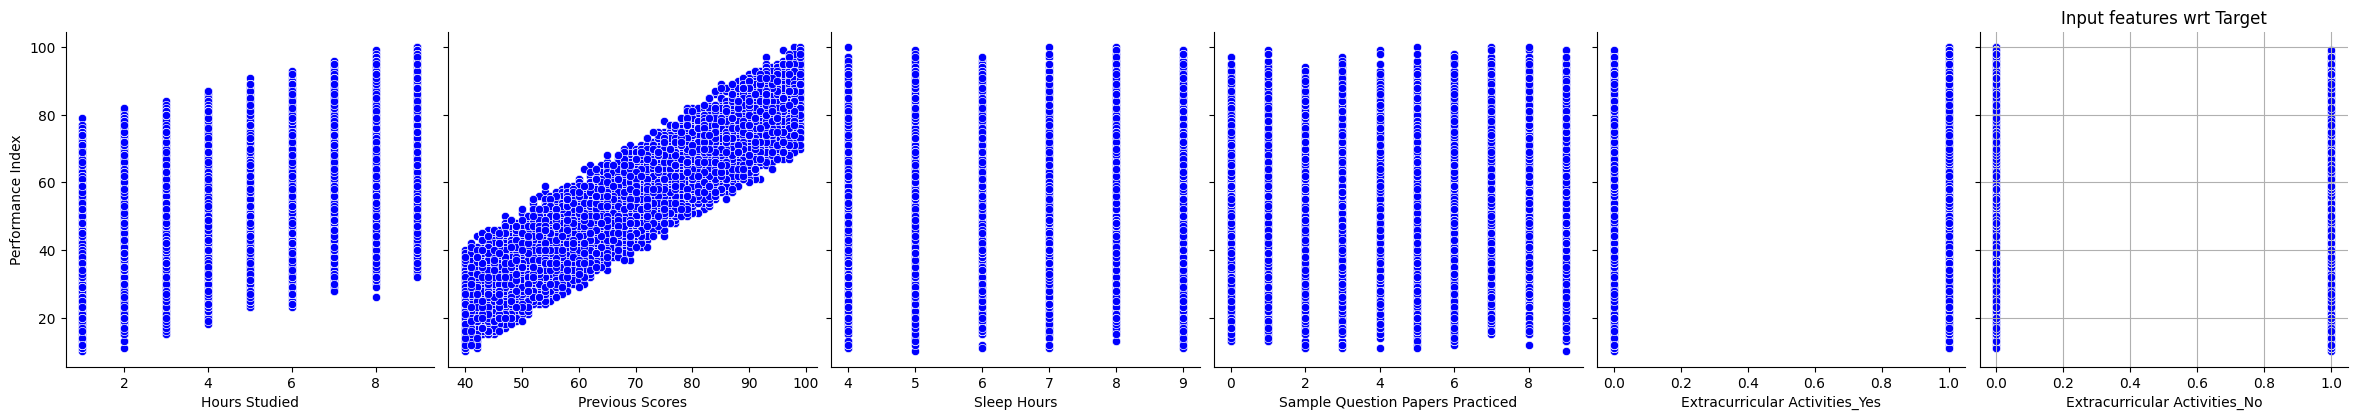

In [42]:
plt.figure(figsize=(8,6))
sns.pairplot(data=data,
             y_vars=["Performance Index"],
             x_vars=["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Extracurricular Activities_Yes","Extracurricular Activities_No"],
             height=4,
             aspect=1,
             kind="scatter",
             plot_kws={'color':"blue"}
            )
plt.title('Input features wrt Target')
plt.grid(True)
plt.show()

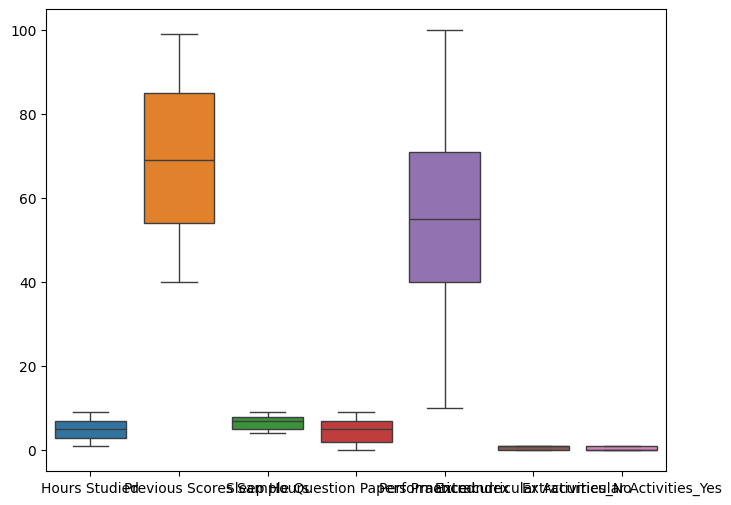

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data)
plt.show()

In [44]:
X_train,X_test,y_train,y_test = train_test_split(data_features,data_target,test_size=0.2)


In [45]:
"""def coeffecients(X,y):
    weights = []
    x_means = np.mean(X,axis=0)
    y_mean = np.mean(y)
    col_data_y = y
    for col in range(X.shape[1]):
        col_data_x = X[:,col]
        col_data_x = col_data_x.reshape(-1, 1)
        col_data_y = col_data_y.reshape(-1, 1)

        if np.isnan(col_data_x).any() or np.isnan(col_data_y).any():
            continue

        variance = np.var(col_data_x)
        covariance = np.cov(col_data_x,col_data_y,rowvar=False)[0][1]
        if variance != 0:
            weight = covariance / variance
        else:
            weight = 0
        weights.append(weight)
    sum = 0
    for x in range(len(weights)):
        sum += weights[x]*x_means[x]
    bias = y_mean - sum

    return weights, bias"""



'def coeffecients(X,y):\n    weights = []\n    x_means = np.mean(X,axis=0)\n    y_mean = np.mean(y)\n    col_data_y = y\n    for col in range(X.shape[1]):\n        col_data_x = X[:,col]\n        col_data_x = col_data_x.reshape(-1, 1)\n        col_data_y = col_data_y.reshape(-1, 1)\n\n        if np.isnan(col_data_x).any() or np.isnan(col_data_y).any():\n            continue\n\n        variance = np.var(col_data_x)\n        covariance = np.cov(col_data_x,col_data_y,rowvar=False)[0][1]\n        if variance != 0:\n            weight = covariance / variance\n        else:\n            weight = 0\n        weights.append(weight)\n    sum = 0\n    for x in range(len(weights)):\n        sum += weights[x]*x_means[x]\n    bias = y_mean - sum\n\n    return weights, bias'

In [46]:
"""class LinearRegressionModel:

    def __init__(self):
        self.weights = []
        self.bias = 0

    def fit(self,X,y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        self.weights,self.bias = coeffecients(X,y)
        weights, bias = coeffecients(X,y)
        predictions = []
        for i in range(len(X)):
            sum = 0
            for x in range(len(weights)):
              sum += weights[x]*X[i][x]
            sum += bias
            predictions.append(sum)
        return predictions

model = LinearRegressionModel()
predictions = model.fit(X_train,y_train)
joblib.dump(model, "model.pkl")
predictions
"""

'class LinearRegressionModel:\n\n    def __init__(self):\n        self.weights = []\n        self.bias = 0\n\n    def fit(self,X,y):\n        X = np.array(X, dtype=float)\n        y = np.array(y, dtype=float)\n        self.weights,self.bias = coeffecients(X,y)\n        weights, bias = coeffecients(X,y)\n        predictions = []\n        for i in range(len(X)):\n            sum = 0\n            for x in range(len(weights)):\n              sum += weights[x]*X[i][x]\n            sum += bias\n            predictions.append(sum)\n        return predictions\n\nmodel = LinearRegressionModel()\npredictions = model.fit(X_train,y_train)\njoblib.dump(model, "model.pkl")\npredictions\n'

In [47]:
model = LinearRegressionModel()
model.fit(X_train,y_train)
X_train = np.array(X_train, dtype=float)
predictions = model.predict(X_train)
joblib.dump(model, "model.pkl")
mean_squared_error(y_train,predictions)

4.713081836008594

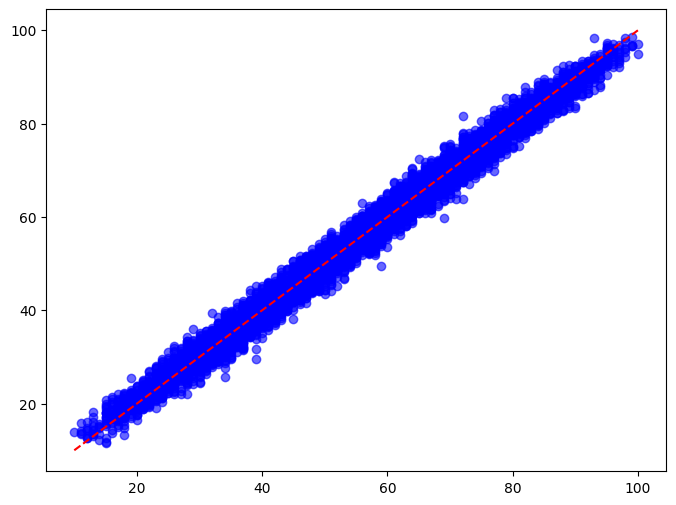

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, predictions, color="blue", alpha=0.6, label="Predicted vs Actual")

max_val = max(max(y_train), max(predictions))
min_val = min(min(y_train), min(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Fit (y=x)")


In [49]:
model = LinearRegressionModel()
model.fit(X_test,y_test)
X_test = np.array(X_test, dtype=float)
test_predictions = model.predict(X_test)
test_predictions

[np.float64(77.37058346865825),
 np.float64(74.17401680462709),
 np.float64(52.643546993997035),
 np.float64(57.40378492996801),
 np.float64(14.391961188091386),
 np.float64(55.03290058734299),
 np.float64(61.65121501869163),
 np.float64(85.34621705845701),
 np.float64(78.06782523457753),
 np.float64(65.77783043686583),
 np.float64(78.5239196932351),
 np.float64(33.33277773007522),
 np.float64(38.91957787031403),
 np.float64(22.41554162268624),
 np.float64(31.15780142720331),
 np.float64(77.53983210313534),
 np.float64(26.334054854621485),
 np.float64(40.71229669325044),
 np.float64(23.466670943486946),
 np.float64(54.82788248601143),
 np.float64(51.60609087620945),
 np.float64(43.857792874606886),
 np.float64(69.1524899008443),
 np.float64(57.707410826496),
 np.float64(29.21169460630442),
 np.float64(60.7739867439097),
 np.float64(81.84791308669948),
 np.float64(34.75385977281394),
 np.float64(50.49309238003548),
 np.float64(33.36794290315038),
 np.float64(32.026230133537126),
 np.flo

In [50]:
mean_squared_error(y_test,test_predictions)

4.6275891205309

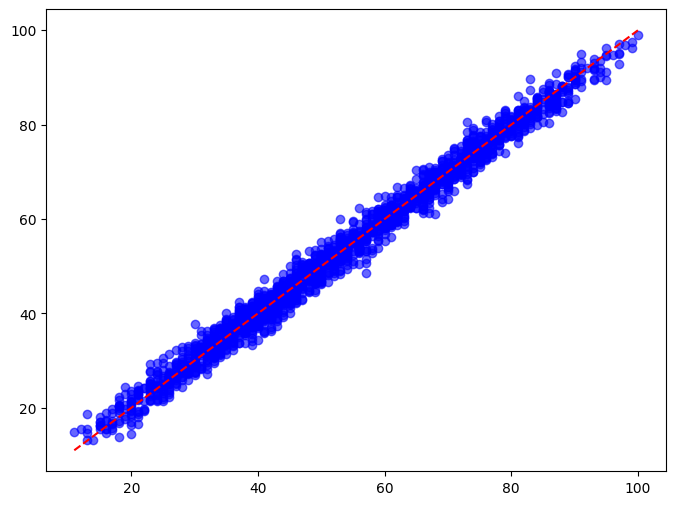

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, test_predictions, color="blue", alpha=0.6, label="Predicted vs Actual")

max_val = max(max(y_test), max(predictions))
min_val = min(min(y_test), min(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Fit (y=x)")


In [52]:
r2_score(y_test,test_predictions)

0.9876608112092027